## **Segmenting and Clustering Neighborhoods in Toronto**

In [ ]:
!pip install geocoder

In [3]:
import pandas as pd
import numpy as np
import requests
import geocoder
import folium
import matplotlib.pyplot as plt


In [4]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

Use pandas to get the tables from the site

In [5]:
web_table = pd.read_html(wiki_url, header=0)

Takes the table in index 0

In [6]:
df = pd.DataFrame(web_table[0])
df.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


Remove Borough values with "Not assigned" values

In [7]:
can_data = df[df['Borough']!='Not assigned']
print(can_data.head())
print(can_data.shape)
can_data = can_data.reset_index()
can_data = can_data.drop('index', axis=1)
can_data.head(5)

  Postal Code           Borough                                Neighbourhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government
(103, 3)


,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [8]:
print(len(can_data))
print(can_data['Postal Code'].unique)

103
<bound method Series.unique of 0      M3A
1      M4A
2      M5A
3      M6A
4      M7A
      ... 
98     M8X
99     M4Y
100    M7Y
101    M8Y
102    M8Z
Name: Postal Code, Length: 103, dtype: object>


Confirming the data is in the correct format. M5A postal cost is listed once and includes the 2 neighborhoods

In [9]:
print(can_data.query("`Postal Code` == 'M5A'"))

  Postal Code           Borough              Neighbourhood
2         M5A  Downtown Toronto  Regent Park, Harbourfront


Append the Latitude and Longitude for the entries

In [11]:
# get the geolocations
geo_csv = "https://cocl.us/Geospatial_data"
df_geo = pd.read_csv(geo_csv)

df_geo.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


Merge the 2 data frames bases on the postal code

In [13]:
merged_df = can_data.merge(df_geo, how='left', left_on='Postal Code', right_on='Postal Code')
print(merged_df.head())
print(merged_df.shape)

  Postal Code           Borough  ...   Latitude  Longitude
0         M3A        North York  ...  43.753259 -79.329656
1         M4A        North York  ...  43.725882 -79.315572
2         M5A  Downtown Toronto  ...  43.654260 -79.360636
3         M6A        North York  ...  43.718518 -79.464763
4         M7A  Downtown Toronto  ...  43.662301 -79.389494

[5 rows x 5 columns]
(103, 5)


In [14]:
print(merged_df.columns) # confirmed all the columns are available. 

Index(['Postal Code', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')


In [103]:
# total number of neighbourhoods in each borough

by_borough = merged_df.groupby('Borough').count()['Neighbourhood']

Visualise the neighborhoods in Toronto

In [111]:
by_boro = pd.DataFrame(by_borough)
print(by_boro)

                  Neighbourhood
Borough                        
Central Toronto               9
Downtown Toronto             19
East Toronto                  5
East York                     5
Etobicoke                    12
Mississauga                   1
North York                   24
Scarborough                  17
West Toronto                  6
York                          5


In [17]:
# get the latitude and longitude for Toronto

address = 'Toronto, Toronto'
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6534817, -79.3839347.


In [88]:
# unique Boroughs

boroughs = merged_df['Borough'].unique().tolist()

In [90]:
# create the map of Toronto
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers
for lat, lng, label, borough in zip(merged_df['Latitude'], merged_df['Longitude'], merged_df['Neighbourhood'], merged_df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=borough_color[borough],
        fill=True,
        fill_color=borough_color[borough],
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto



Map for Downtown Toronto Neighbourhoods

In [19]:
# create DF for Toronto
toronto_df = merged_df.query("Borough =='Downtown Toronto'")
print(toronto_df.head())

   Postal Code           Borough  ...   Latitude  Longitude
2          M5A  Downtown Toronto  ...  43.654260 -79.360636
4          M7A  Downtown Toronto  ...  43.662301 -79.389494
9          M5B  Downtown Toronto  ...  43.657162 -79.378937
15         M5C  Downtown Toronto  ...  43.651494 -79.375418
20         M5E  Downtown Toronto  ...  43.644771 -79.373306

[5 rows x 5 columns]


In [20]:
# create the map of Toronto
map_dt_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_dt_toronto)  
    
map_dt_toronto

In [27]:
# FourSquare Credentials

CLIENT_ID = 'YRUQY0JGVLGJXENFNXELCMVQZAGG0SDC54GHW2SPCZI1SLQY' # Foursquare ID
CLIENT_SECRET = '3C210CKZBHWVQN3BZCEM3YB5VRYLHXLEBGJLFF2KHFMIBXNI' # Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 500

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: YRUQY0JGVLGJXENFNXELCMVQZAGG0SDC54GHW2SPCZI1SLQY
CLIENT_SECRET:3C210CKZBHWVQN3BZCEM3YB5VRYLHXLEBGJLFF2KHFMIBXNI


In [26]:
# function to retrieve FourSquare API

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Get the venue data foe downtown Toronto

In [38]:

toronto_venues = getNearbyVenues(names=merged_df['Neighbourhood'],
                                   latitudes=merged_df['Latitude'],
                                   longitudes=merged_df['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [39]:

print(toronto_venues.shape)
toronto_venues.head()

(2124, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [40]:

toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",6,6,6,6,6,6
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
...,...,...,...,...,...,...
"Willowdale, Willowdale East",34,34,34,34,34,34
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,3,3,3,3,3,3


In [41]:
# number of unique categories.

print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 269 uniques categories.


In [42]:
print(toronto_venues['Venue Category'].unique())

['Park' 'Food & Drink Shop' 'Hockey Arena' 'Portuguese Restaurant'
 'Coffee Shop' 'Pizza Place' 'Bakery' 'Distribution Center' 'Spa'
 'Restaurant' 'Historic Site' 'Breakfast Spot' 'Gym / Fitness Center'
 'Pub' 'Farmers Market' 'Chocolate Shop' 'Dessert Shop'
 'Performing Arts Venue' 'Theater' 'French Restaurant' 'Café'
 'Mexican Restaurant' 'Yoga Studio' 'Event Space' 'Shoe Store'
 'Ice Cream Shop' 'Cosmetics Shop' 'Electronics Store' 'Bank' 'Beer Store'
 'Wine Shop' 'Antique Shop' 'Boutique' 'Furniture / Home Store'
 'Vietnamese Restaurant' 'Clothing Store' 'Accessories Store'
 'Italian Restaurant' 'Creperie' 'Beer Bar' 'Sushi Restaurant'
 'Persian Restaurant' 'Arts & Crafts Store' 'Hobby Shop'
 'Japanese Restaurant' 'Diner' 'Fried Chicken Joint' 'Smoothie Shop'
 'Sandwich Place' 'College Auditorium' 'Gym' 'Bar' 'College Cafeteria'
 'Vegetarian / Vegan Restaurant' 'Music Venue' 'General Entertainment'
 'Fast Food Restaurant' 'Caribbean Restaurant' 'Gastropub' 'Pharmacy'
 'Intersection

Get the neighbourhoods with Italian Restaurants.

In [43]:
neighbourhoods_with_italian_res = toronto_venues.query("`Venue Category` == 'Italian Restaurant'")
print(neighbourhoods_with_italian_res)

                                           Neighborhood  ...      Venue Category
65          Queen's Park, Ontario Provincial Government  ...  Italian Restaurant
153                            Garden District, Ryerson  ...  Italian Restaurant
160                            Garden District, Ryerson  ...  Italian Restaurant
221                                           Don Mills  ...  Italian Restaurant
249                                      St. James Town  ...  Italian Restaurant
316                                      St. James Town  ...  Italian Restaurant
378                                         Berczy Park  ...  Italian Restaurant
466                                  Central Bay Street  ...  Italian Restaurant
470                                  Central Bay Street  ...  Italian Restaurant
513                                  Central Bay Street  ...  Italian Restaurant
522                                            Christie  ...  Italian Restaurant
813   Harbourfront East, Uni

Peak at the Neighbourhoods where the total Italian restaurants is 1

In [44]:
grouped_neighbourhoods = neighbourhoods_with_italian_res.groupby('Neighborhood').count()
print(grouped_neighbourhoods.query("`Venue Category` == 1"))

                                              Neighborhood Latitude  ...  Venue Category
Neighborhood                                                         ...                
Berczy Park                                                       1  ...               1
Brockton, Parkdale Village, Exhibition Place                      1  ...               1
Christie                                                          1  ...               1
Clarks Corners, Tam O'Shanter, Sullivan                           1  ...               1
Don Mills                                                         1  ...               1
First Canadian Place, Underground city                            1  ...               1
High Park, The Junction South                                     1  ...               1
India Bazaar, The Beaches West                                    1  ...               1
Little Portugal, Trinity                                          1  ...               1
Parkdale, Roncesvalle

In [45]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
col_list = list(toronto_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]

toronto_onehot = toronto_onehot[cols]
toronto_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,...,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Victoria Village,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,...,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# get Italian restaurants and neighbourhoods

italian_res_grouped = toronto_grouped[['Neighborhood', 'Italian Restaurant']]

print(italian_res_grouped)

                                       Neighborhood  Italian Restaurant
0                                         Agincourt                0.00
1                            Alderwood, Long Branch                0.00
2   Bathurst Manor, Wilson Heights, Downsview North                0.00
3                                   Bayview Village                0.00
4                 Bedford Park, Lawrence Manor East                0.08
..                                              ...                 ...
90                      Willowdale, Willowdale East                0.00
91                      Willowdale, Willowdale West                0.00
92                                           Woburn                0.00
93                                 Woodbine Heights                0.00
94                                  York Mills West                0.00

[95 rows x 2 columns]


In [52]:
from sklearn.cluster import KMeans

kclusters = 4

# drop neighbourhood
grouped_clustering = italian_res_grouped.drop(['Neighborhood'], axis=1)



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 3, 2, 0, 1, 0, 0], dtype=int32)

In [53]:
len(kmeans.labels_)

95

In [ ]:
# add clustering labels
italian_res_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
print(italian_res_grouped.head())

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_grouped_merged = italian_res_grouped.merge(toronto_venues, how='left', left_on='Neighborhood', right_on='Neighborhood')
print(toronto_grouped_merged.head())

In [61]:
print(italian_res_grouped.head())
print(italian_res_grouped.columns)

   Cluster Labels  ... Italian Restaurant
0               0  ...               0.00
1               0  ...               0.00
2               0  ...               0.00
3               0  ...               0.00
4               3  ...               0.08

[5 rows x 3 columns]
Index(['Cluster Labels', 'Neighborhood', 'Italian Restaurant'], dtype='object')


In [62]:
print(toronto_grouped_merged.head())
print(len(toronto_grouped_merged))

   Cluster Labels  ...             Venue Category
0               0  ...             Breakfast Spot
1               0  ...                     Lounge
2               0  ...  Latin American Restaurant
3               0  ...               Skating Rink
4               0  ...                Pizza Place

[5 rows x 9 columns]
2124


In [65]:
print(toronto_grouped_merged.query("`Cluster Labels` == 1"))

      Cluster Labels  ...       Venue Category
123                1  ...                  Gym
124                1  ...                  Bar
125                1  ...          Coffee Shop
126                1  ...   Italian Restaurant
127                1  ...          Coffee Shop
...              ...  ...                  ...
1660               1  ...               Market
1661               1  ...  American Restaurant
1662               1  ...        Grocery Store
1663               1  ...          Snack Place
1664               1  ...          Pizza Place

[286 rows x 9 columns]


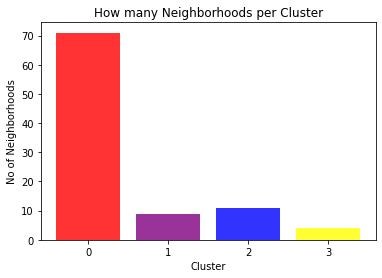

   Cluster Labels
0              71
1               9
2              11
3               4


In [102]:
# plot neighbourhoods verses clusters.

objects = (0,1,2,3)
y_pos = np.arange(len(objects))
performance = italian_res_grouped['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['red', 'purple','Blue', 'yellow'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighborhoods')
plt.xlabel('Cluster')
plt.title('How many Neighborhoods per Cluster')

plt.show()
print(performance.head())

In [66]:
# visualise the results of clustering
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_grouped_merged['Neighborhood Latitude'], toronto_grouped_merged['Neighborhood Longitude'], toronto_grouped_merged['Neighborhood'], toronto_grouped_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

Look at each cluster a bit closer

In [78]:
# shows the number of italian restaurants per cluster label. This shows that cluster 3 is the most appropriate. 
print(italian_res_grouped.head())
print(italian_res_grouped['Cluster Labels'].value_counts())
print(len(italian_res_grouped))
print(italian_res_grouped.columns)

   Cluster Labels  ... Italian Restaurant
0               0  ...               0.00
1               0  ...               0.00
2               0  ...               0.00
3               0  ...               0.00
4               3  ...               0.08

[5 rows x 3 columns]
0    71
2    11
1     9
3     4
Name: Cluster Labels, dtype: int64
95
Index(['Cluster Labels', 'Neighborhood', 'Italian Restaurant'], dtype='object')


The above shows that cluster 3 seem to have 4 restaurants. We'll drill into that a bit more below.

In [85]:
# add back the borough to the values. 
italian_res_inc_bor = italian_res_grouped.merge(can_data, how='left', left_on='Neighborhood', right_on='Neighbourhood')

italian_res_inc_bor = italian_res_inc_bor.drop(['Neighbourhood', 'Postal Code'], axis=1)

print(italian_res_inc_bor.columns)
print(italian_res_inc_bor.head)

Index(['Cluster Labels', 'Neighborhood', 'Italian Restaurant', 'Borough'], dtype='object')
<bound method NDFrame.head of     Cluster Labels  ...      Borough
0                0  ...  Scarborough
1                0  ...    Etobicoke
2                0  ...   North York
3                0  ...   North York
4                3  ...   North York
..             ...  ...          ...
94               0  ...   North York
95               0  ...   North York
96               0  ...  Scarborough
97               0  ...    East York
98               0  ...   North York

[99 rows x 4 columns]>


In [97]:
# neighborhoods and borough in group 1
neighborhoods_group_0 = italian_res_inc_bor.query("`Cluster Labels` == 0")
neighborhoods_group_0 = neighborhoods_group_0[['Neighborhood', 'Borough', 'Italian Restaurant']]

print(neighborhoods_group_0.sort_values('Italian Restaurant', ascending=False))

                                         Neighborhood  ... Italian Restaurant
33             First Canadian Place, Underground city  ...               0.01
0                                           Agincourt  ...               0.00
73                      Runnymede, The Junction North  ...               0.00
70                                           Roselawn  ...               0.00
69                                           Rosedale  ...               0.00
..                                                ...  ...                ...
36                                          Glencairn  ...               0.00
34    Forest Hill North & West, Forest Hill Road Park  ...               0.00
32                       Fairview, Henry Farm, Oriole  ...               0.00
31  Eringate, Bloordale Gardens, Old Burnhamthorpe...  ...               0.00
98                                    York Mills West  ...               0.00

[74 rows x 3 columns]


In [98]:
# neighborhoods and borough in group 2
neighborhoods_group_2 = italian_res_inc_bor.query("`Cluster Labels` == 2")
neighborhoods_group_2 = neighborhoods_group_2[['Neighborhood', 'Borough', 'Italian Restaurant']]

print(neighborhoods_group_2.sort_values('Italian Restaurant', ascending=False))

                                         Neighborhood  ... Italian Restaurant
79                                     Stn A PO Boxes  ...           0.031250
39  Harbourfront East, Union Station, Toronto Islands  ...           0.030000
87           Toronto Dominion Centre, Design Exchange  ...           0.030000
66        Queen's Park, Ontario Provincial Government  ...           0.027778
88                     University of Toronto, Harbord  ...           0.027778
80                                    Studio District  ...           0.025000
76                                     St. James Town  ...           0.023529
52                           Little Portugal, Trinity  ...           0.021277
18                     Commerce Court, Victoria Hotel  ...           0.020000
35                           Garden District, Ryerson  ...           0.020000
5                                         Berczy Park  ...           0.017241

[11 rows x 3 columns]


In [93]:
# neighborhoods and borough in group 3
neighborhoods_group_2 = italian_res_inc_bor.query("`Cluster Labels` == 2")
print(neighborhoods_group_2[['Neighborhood', 'Borough', 'Italian Restaurant']])

                                         Neighborhood  ... Italian Restaurant
5                                         Berczy Park  ...           0.017241
18                     Commerce Court, Victoria Hotel  ...           0.020000
35                           Garden District, Ryerson  ...           0.020000
39  Harbourfront East, Union Station, Toronto Islands  ...           0.030000
52                           Little Portugal, Trinity  ...           0.021277
66        Queen's Park, Ontario Provincial Government  ...           0.027778
76                                     St. James Town  ...           0.023529
79                                     Stn A PO Boxes  ...           0.031250
80                                    Studio District  ...           0.025000
87           Toronto Dominion Centre, Design Exchange  ...           0.030000
88                     University of Toronto, Harbord  ...           0.027778

[11 rows x 3 columns]


In [92]:
# neighborhoods and borough in group 4
neighborhoods_group_3 = italian_res_inc_bor.query("`Cluster Labels` == 3")
print(neighborhoods_group_3[['Neighborhood', 'Borough', 'Italian Restaurant']])

                               Neighborhood       Borough  Italian Restaurant
4         Bedford Park, Lawrence Manor East    North York            0.080000
16  Clarks Corners, Tam O'Shanter, Sullivan   Scarborough            0.071429
63                   Parkdale, Roncesvalles  West Toronto            0.071429
84             The Danforth West, Riverdale  East Toronto            0.071429


In [99]:
average_it_res_cluster = italian_res_inc_bor.groupby('Cluster Labels').mean()['Italian Restaurant']

In [100]:
print(average_it_res_cluster)

Cluster Labels
0    0.000135
1    0.048285
2    0.024896
3    0.073571
Name: Italian Restaurant, dtype: float64
